# Predicting Heart Disease


* The target is to identify whether the patient has heart disease or not.

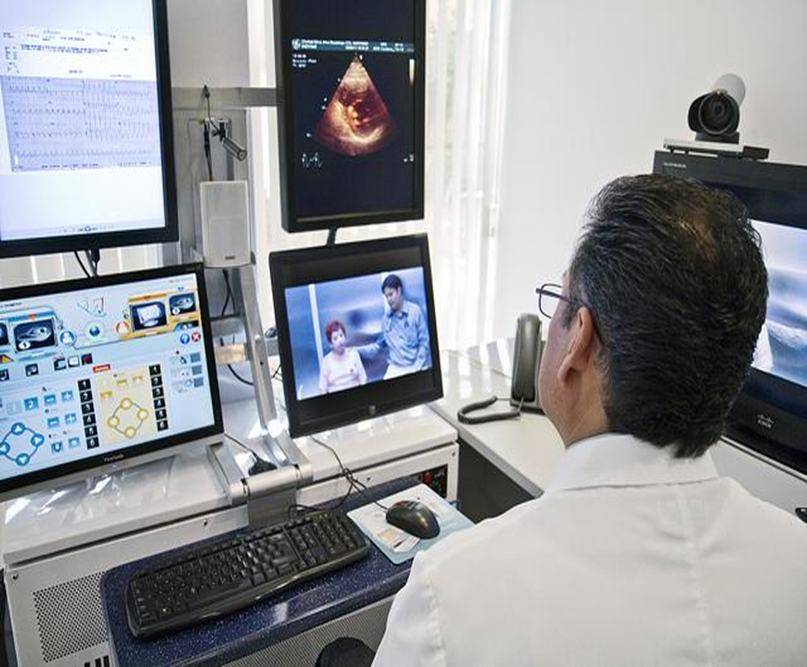

# Introduction
* We will go through the entire data pipeline from data cleaning,
  preprocessing, staging and modeling on a relatively dataset. On our way, we will compare different machine learning models and try to measure their performance using verious metrics.

# Dataset

* Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.
* Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.


# Domain Analysis

Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.

In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their website:

* About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.

* Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in    2009 were in men.

* Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.

* Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.


# Dataset Description

**There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.


**slope_of_peak_exercise_st_segment (type: int)** : the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

**thal (type: categorical)**: results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

**resting_blood_pressure (type: int)**: resting blood pressure

**chest_pain_type (type: int)**: chest pain type (4 values)

**num_major_vessels (type: int)**: number of major vessels (0-3) colored by flourosopy

**fasting_blood_sugar_gt_120_mg_per_dl (type: binary)**: fasting blood sugar > 120 mg/dl

**resting_ekg_results (type: int)**: resting electrocardiographic results (values 0,1,2)

**serum_cholesterol_mg_per_dl (type: int)**: serum cholestoral in mg/dl

**oldpeak_eq_st_depression (type: float)**: oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

**sex (type: binary)**: 0: female, 1: male

**age (type: int)**: age in years

**max_heart_rate_achieved (type: int)**: maximum heart rate achieved (beats per minute)

**exercise_induced_angina (type: binary)**: exercise-induced chest pain (0: False, 1: True)
 



# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Reading Dataset

In [2]:
data1=pd.read_csv('labels.csv')

In [3]:
data1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [4]:
data2=pd.read_csv('values.csv')

In [5]:
data2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [6]:
data=pd.concat([data1,data2],axis=1)

In [7]:
data

,patient_id,heart_disease_present,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [8]:
duplicate_columns=data.columns[data.columns.duplicated()]

In [9]:
data.columns.duplicated()

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [10]:
duplicate_columns

Index(['patient_id'], dtype='object')

In [11]:
data = data.drop(data.columns[0], axis=1)


In [12]:
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


# Basic Checks

In [13]:
data.shape

(180, 14)

In [14]:
data.head()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [15]:
data.tail()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,0,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   heart_disease_present                 180 non-null    int64  
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [17]:
data.describe()

,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [18]:
data.columns

Index(['heart_disease_present', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

# EDA

## Univariate Analysis

In [19]:
#pip install sweetviz

In [20]:
import sweetviz as sv

In [21]:
report = sv.analyze(data)

                                             |     | [  0%]   00:00 -> (? left)

In [22]:
report.show_html('sweetviz_report.html')


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

In [23]:
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [24]:
data = data.rename(columns={'heart_disease_present': 'Output'})


In [25]:
data

,Output,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


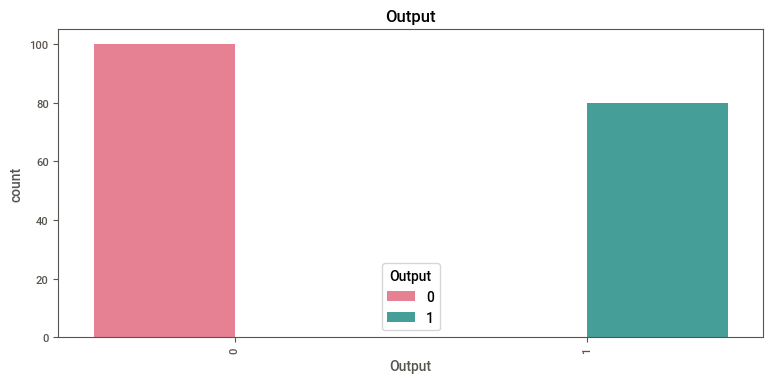

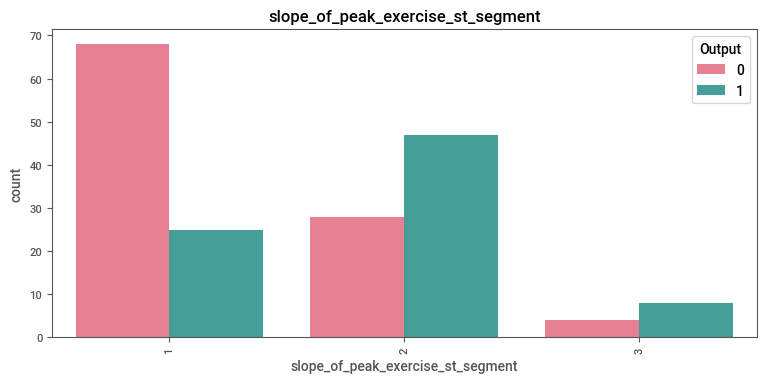

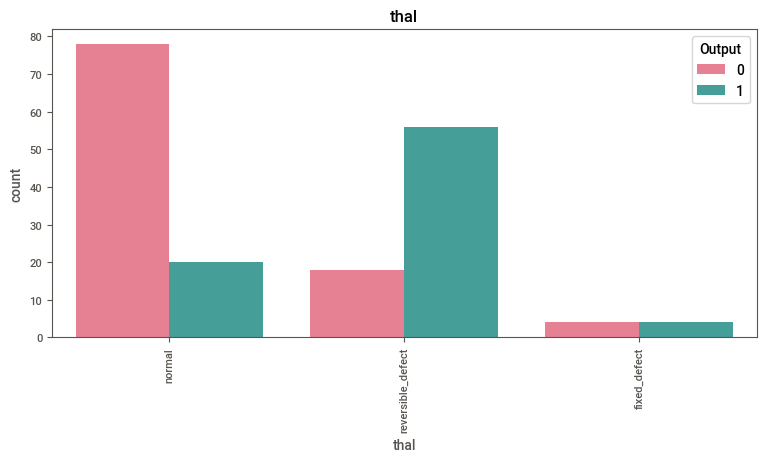

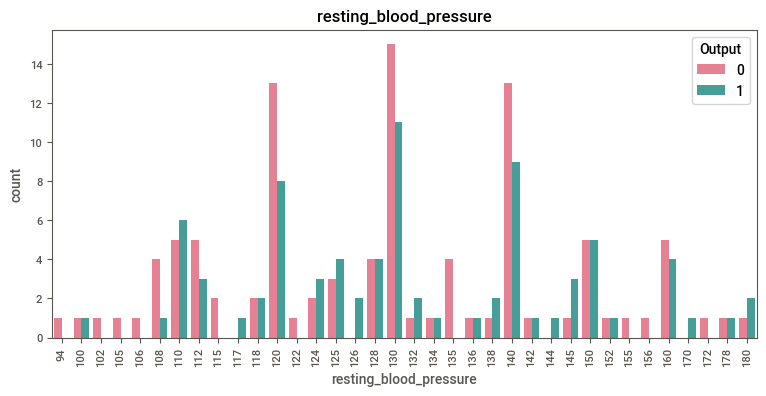

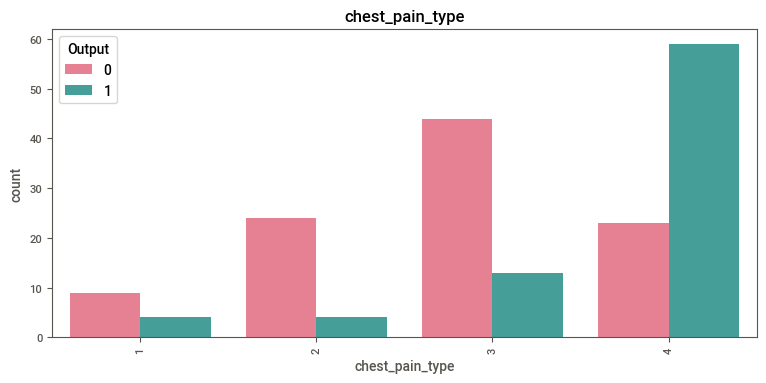

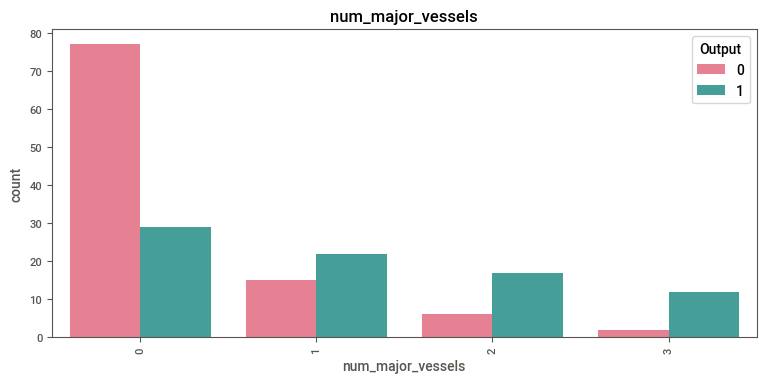

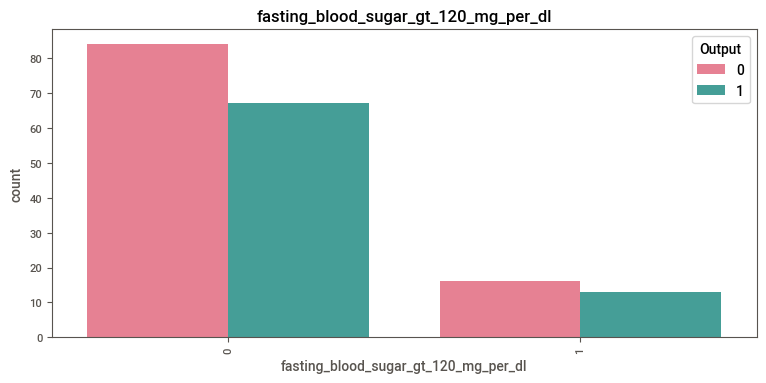

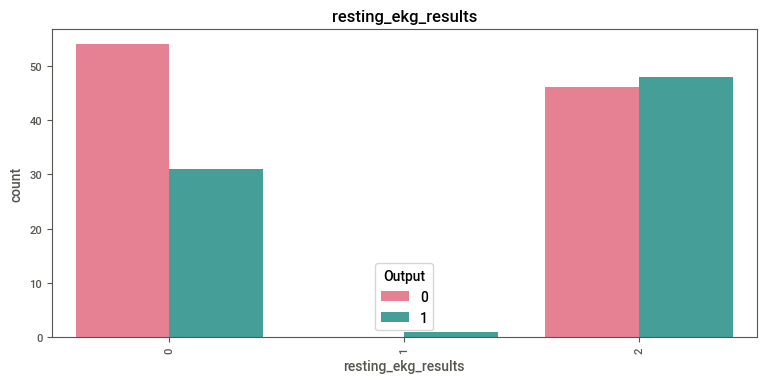

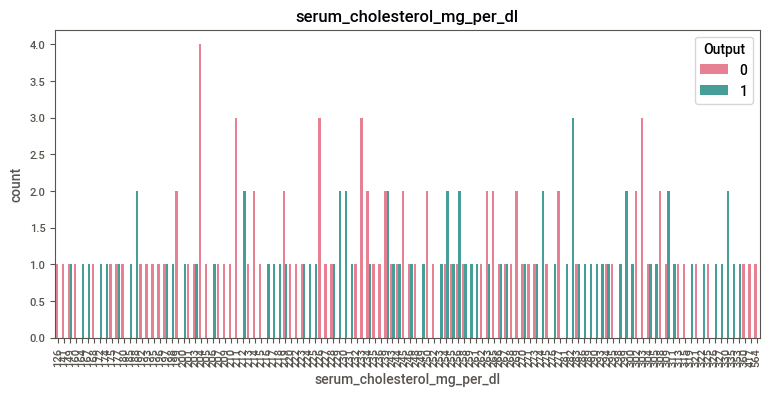

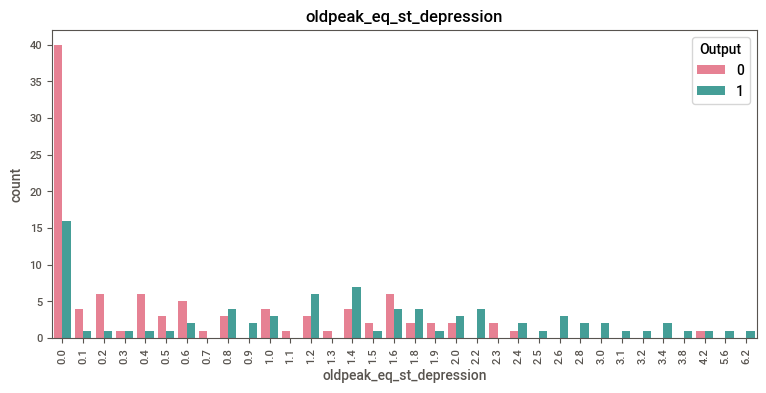

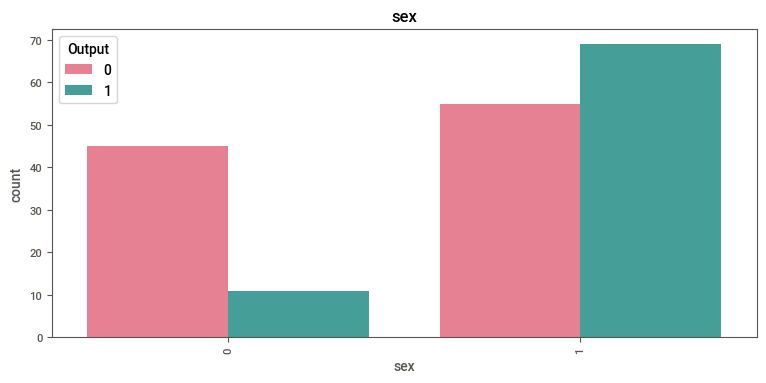

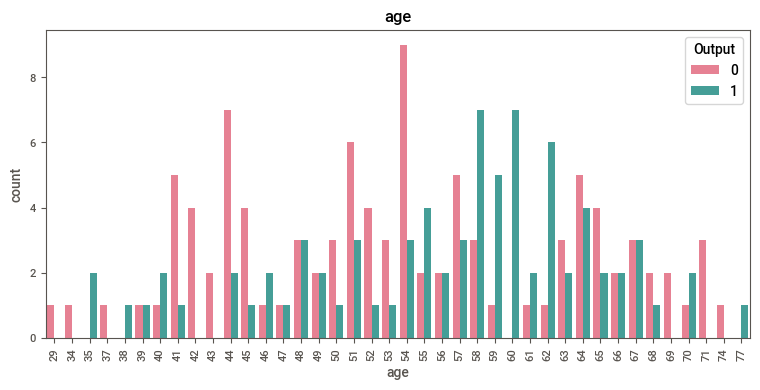

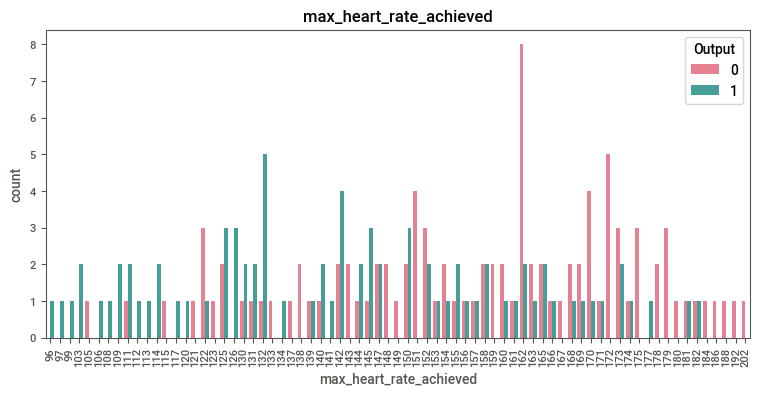

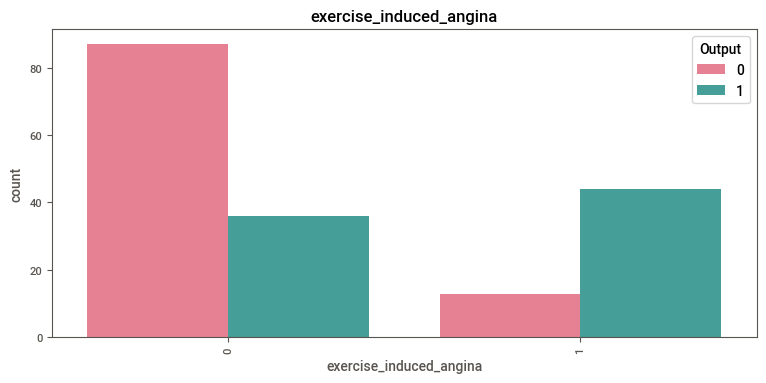

In [26]:
# Setting a color palette with different colors for each bar
palette = sns.color_palette("husl", n_colors=len(data['Output'].unique()))

# Plotting a count plot for each categorical variable with different colors
for column in data:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.countplot(x=data[column], hue=data['Output'], data=data, palette=palette)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

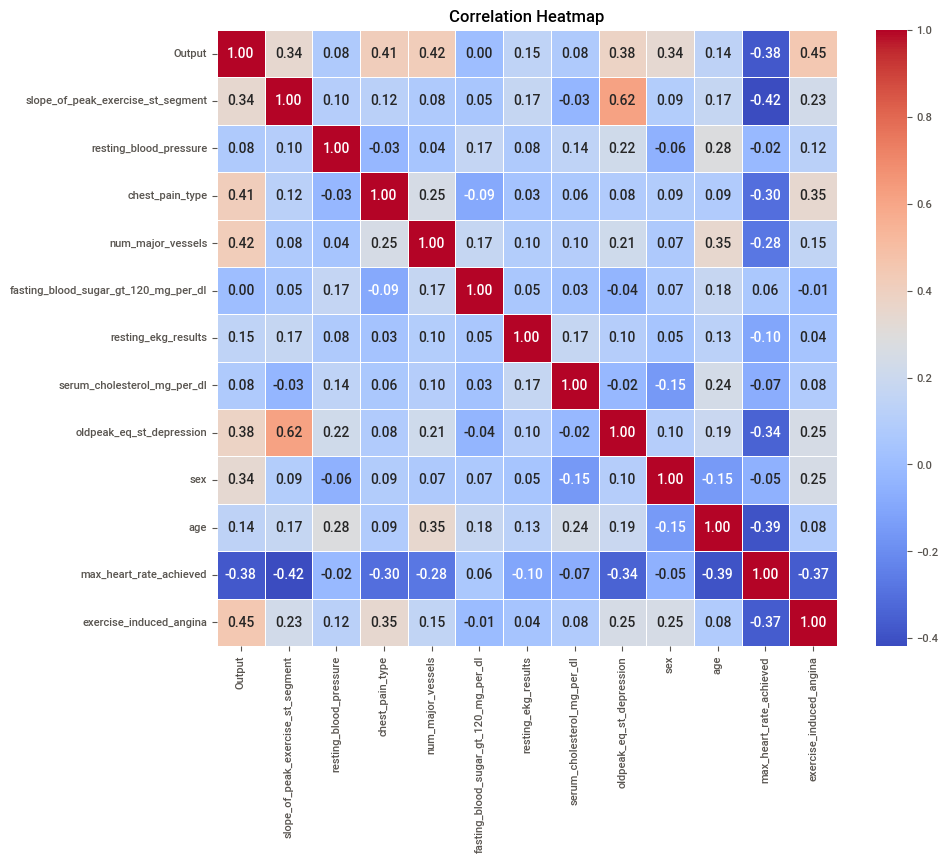

In [27]:
numeric_columns = data.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# Multivariate Analysis

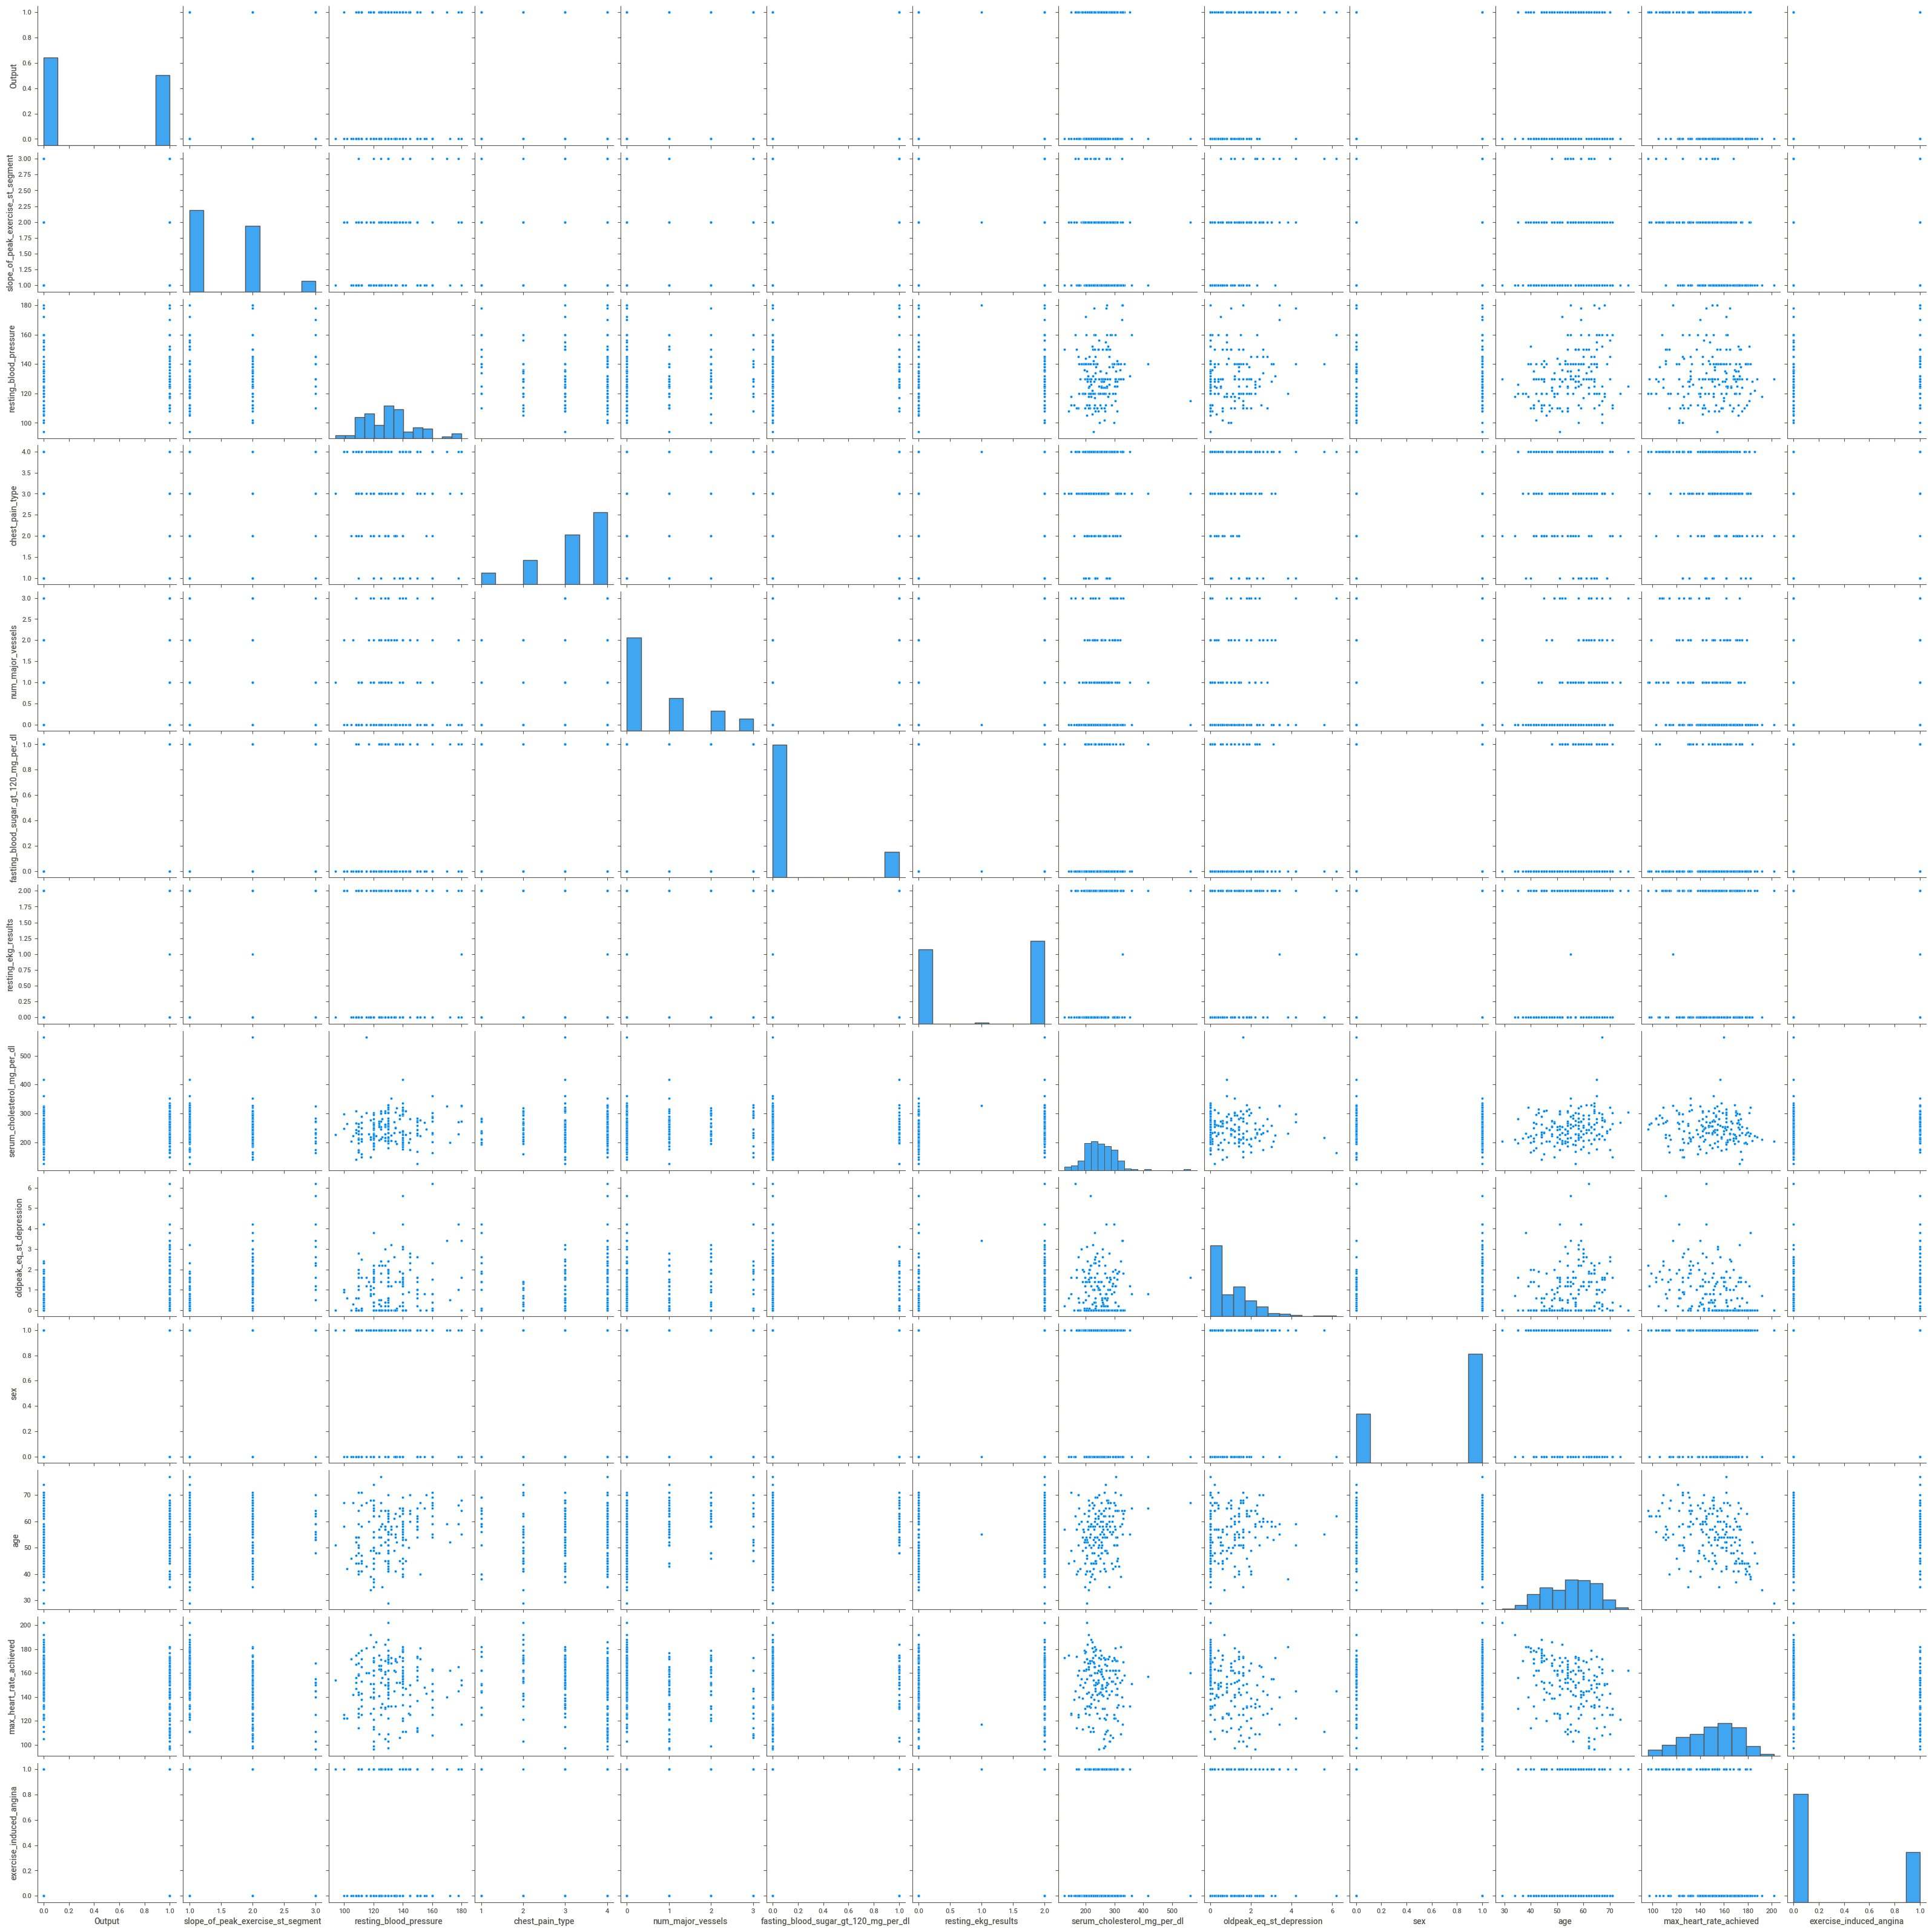

In [28]:
sns.pairplot(data)

In [29]:
data

,Output,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


# Data Preprocessing

In [30]:
data.isnull().sum()

Output                                  0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [31]:
data.fasting_blood_sugar_gt_120_mg_per_dl.unique()

array([0, 1], dtype=int64)

In [32]:
data

,Output,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


# Data Encoding

In [33]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder
data['thal'] =LabelEncoder().fit_transform(data['thal'])

# Outlier Handling

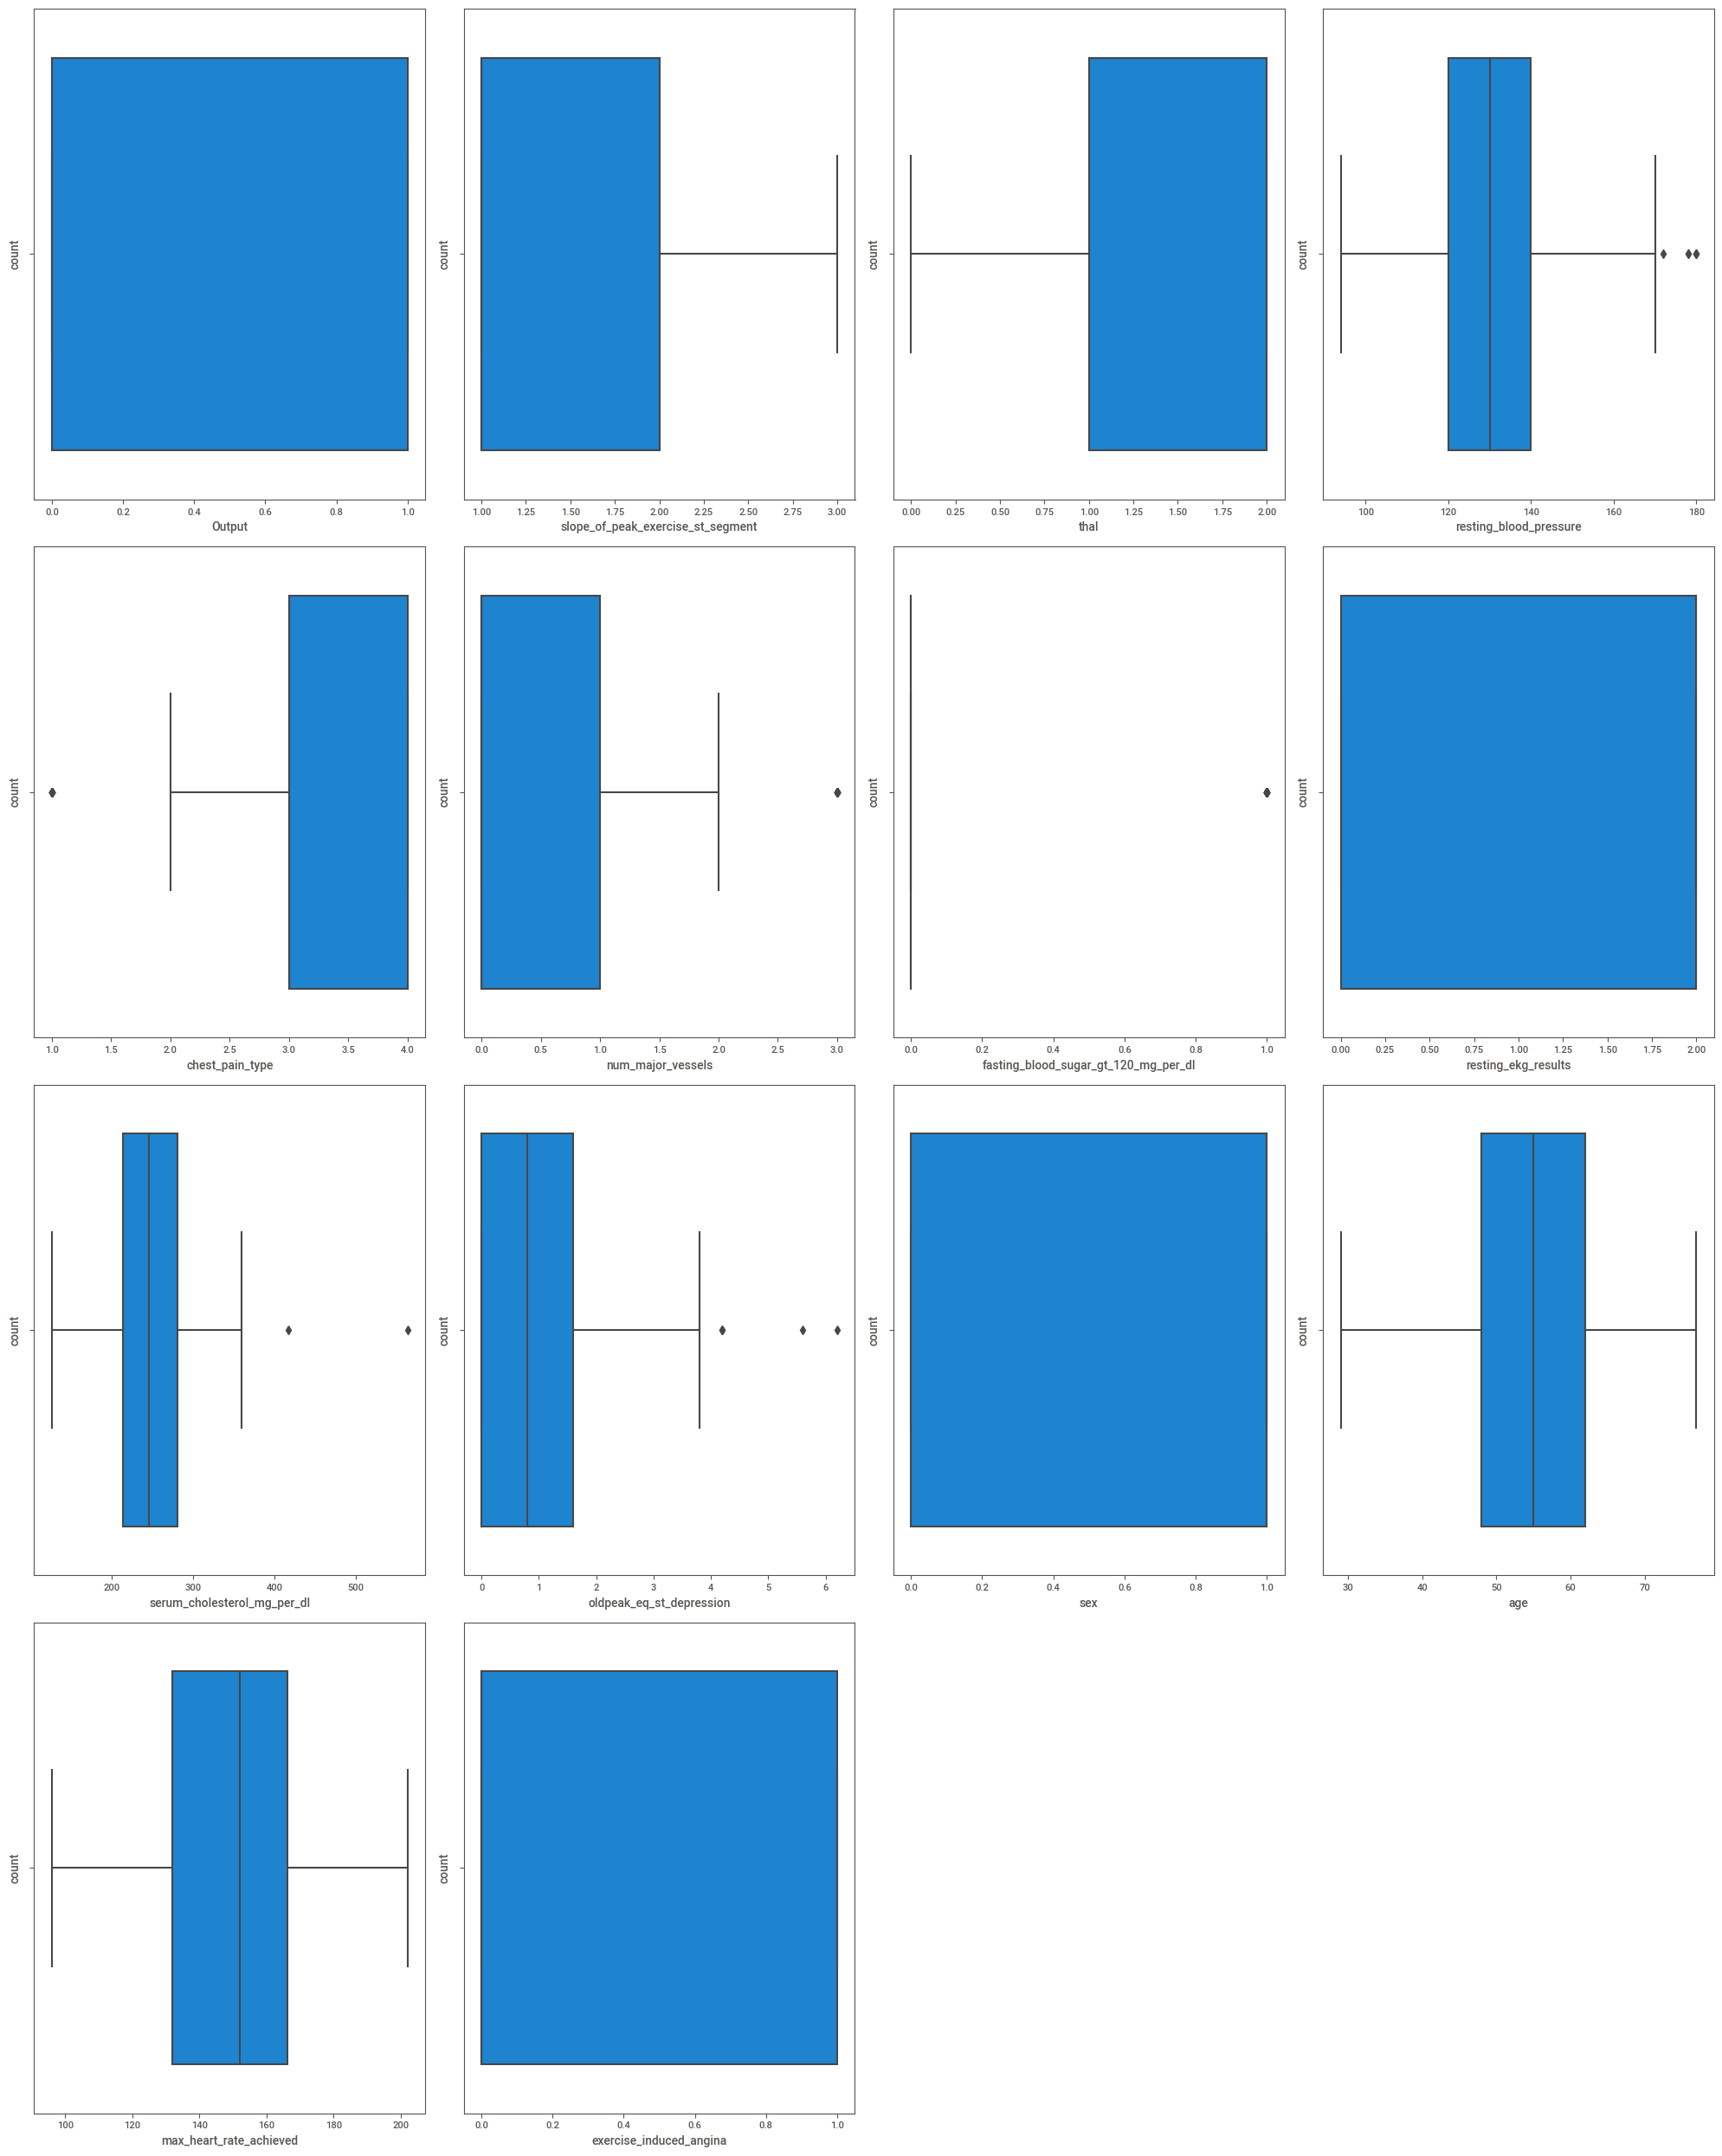

In [35]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=data[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [36]:
from scipy import stats  # Make sure to import the necessary libraries

col = 1
for c in data:  # Assuming df1 is your DataFrame
    if col <=14:
        IQR = stats.iqr(data[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        data.loc[(data[c] < min_limit) | (data[c] > max_limit), c] = np.median(data[c])

        # Double-check if outliers are replaced
        replaced_outliers = data.loc[(data[c] < min_limit) | (data[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1

Output IQR: 1.0
Output min_limit: -1.5
Output max_limit: 2.5 

Replaced outliers in Output: Series([], Name: Output, dtype: int64) 

slope_of_peak_exercise_st_segment IQR: 1.0
slope_of_peak_exercise_st_segment min_limit: -0.5
slope_of_peak_exercise_st_segment max_limit: 3.5 

Replaced outliers in slope_of_peak_exercise_st_segment: Series([], Name: slope_of_peak_exercise_st_segment, dtype: int64) 

thal IQR: 1.0
thal min_limit: -0.5
thal max_limit: 3.5 

Replaced outliers in thal: Series([], Name: thal, dtype: int32) 

resting_blood_pressure IQR: 20.0
resting_blood_pressure min_limit: 90.0
resting_blood_pressure max_limit: 170.0 

Replaced outliers in resting_blood_pressure: Series([], Name: resting_blood_pressure, dtype: int64) 

chest_pain_type IQR: 1.0
chest_pain_type min_limit: 1.5
chest_pain_type max_limit: 5.5 

Replaced outliers in chest_pain_type: Series([], Name: chest_pain_type, dtype: int64) 

num_major_vessels IQR: 1.0
num_major_vessels min_limit: -1.5
num_major_vessels max_

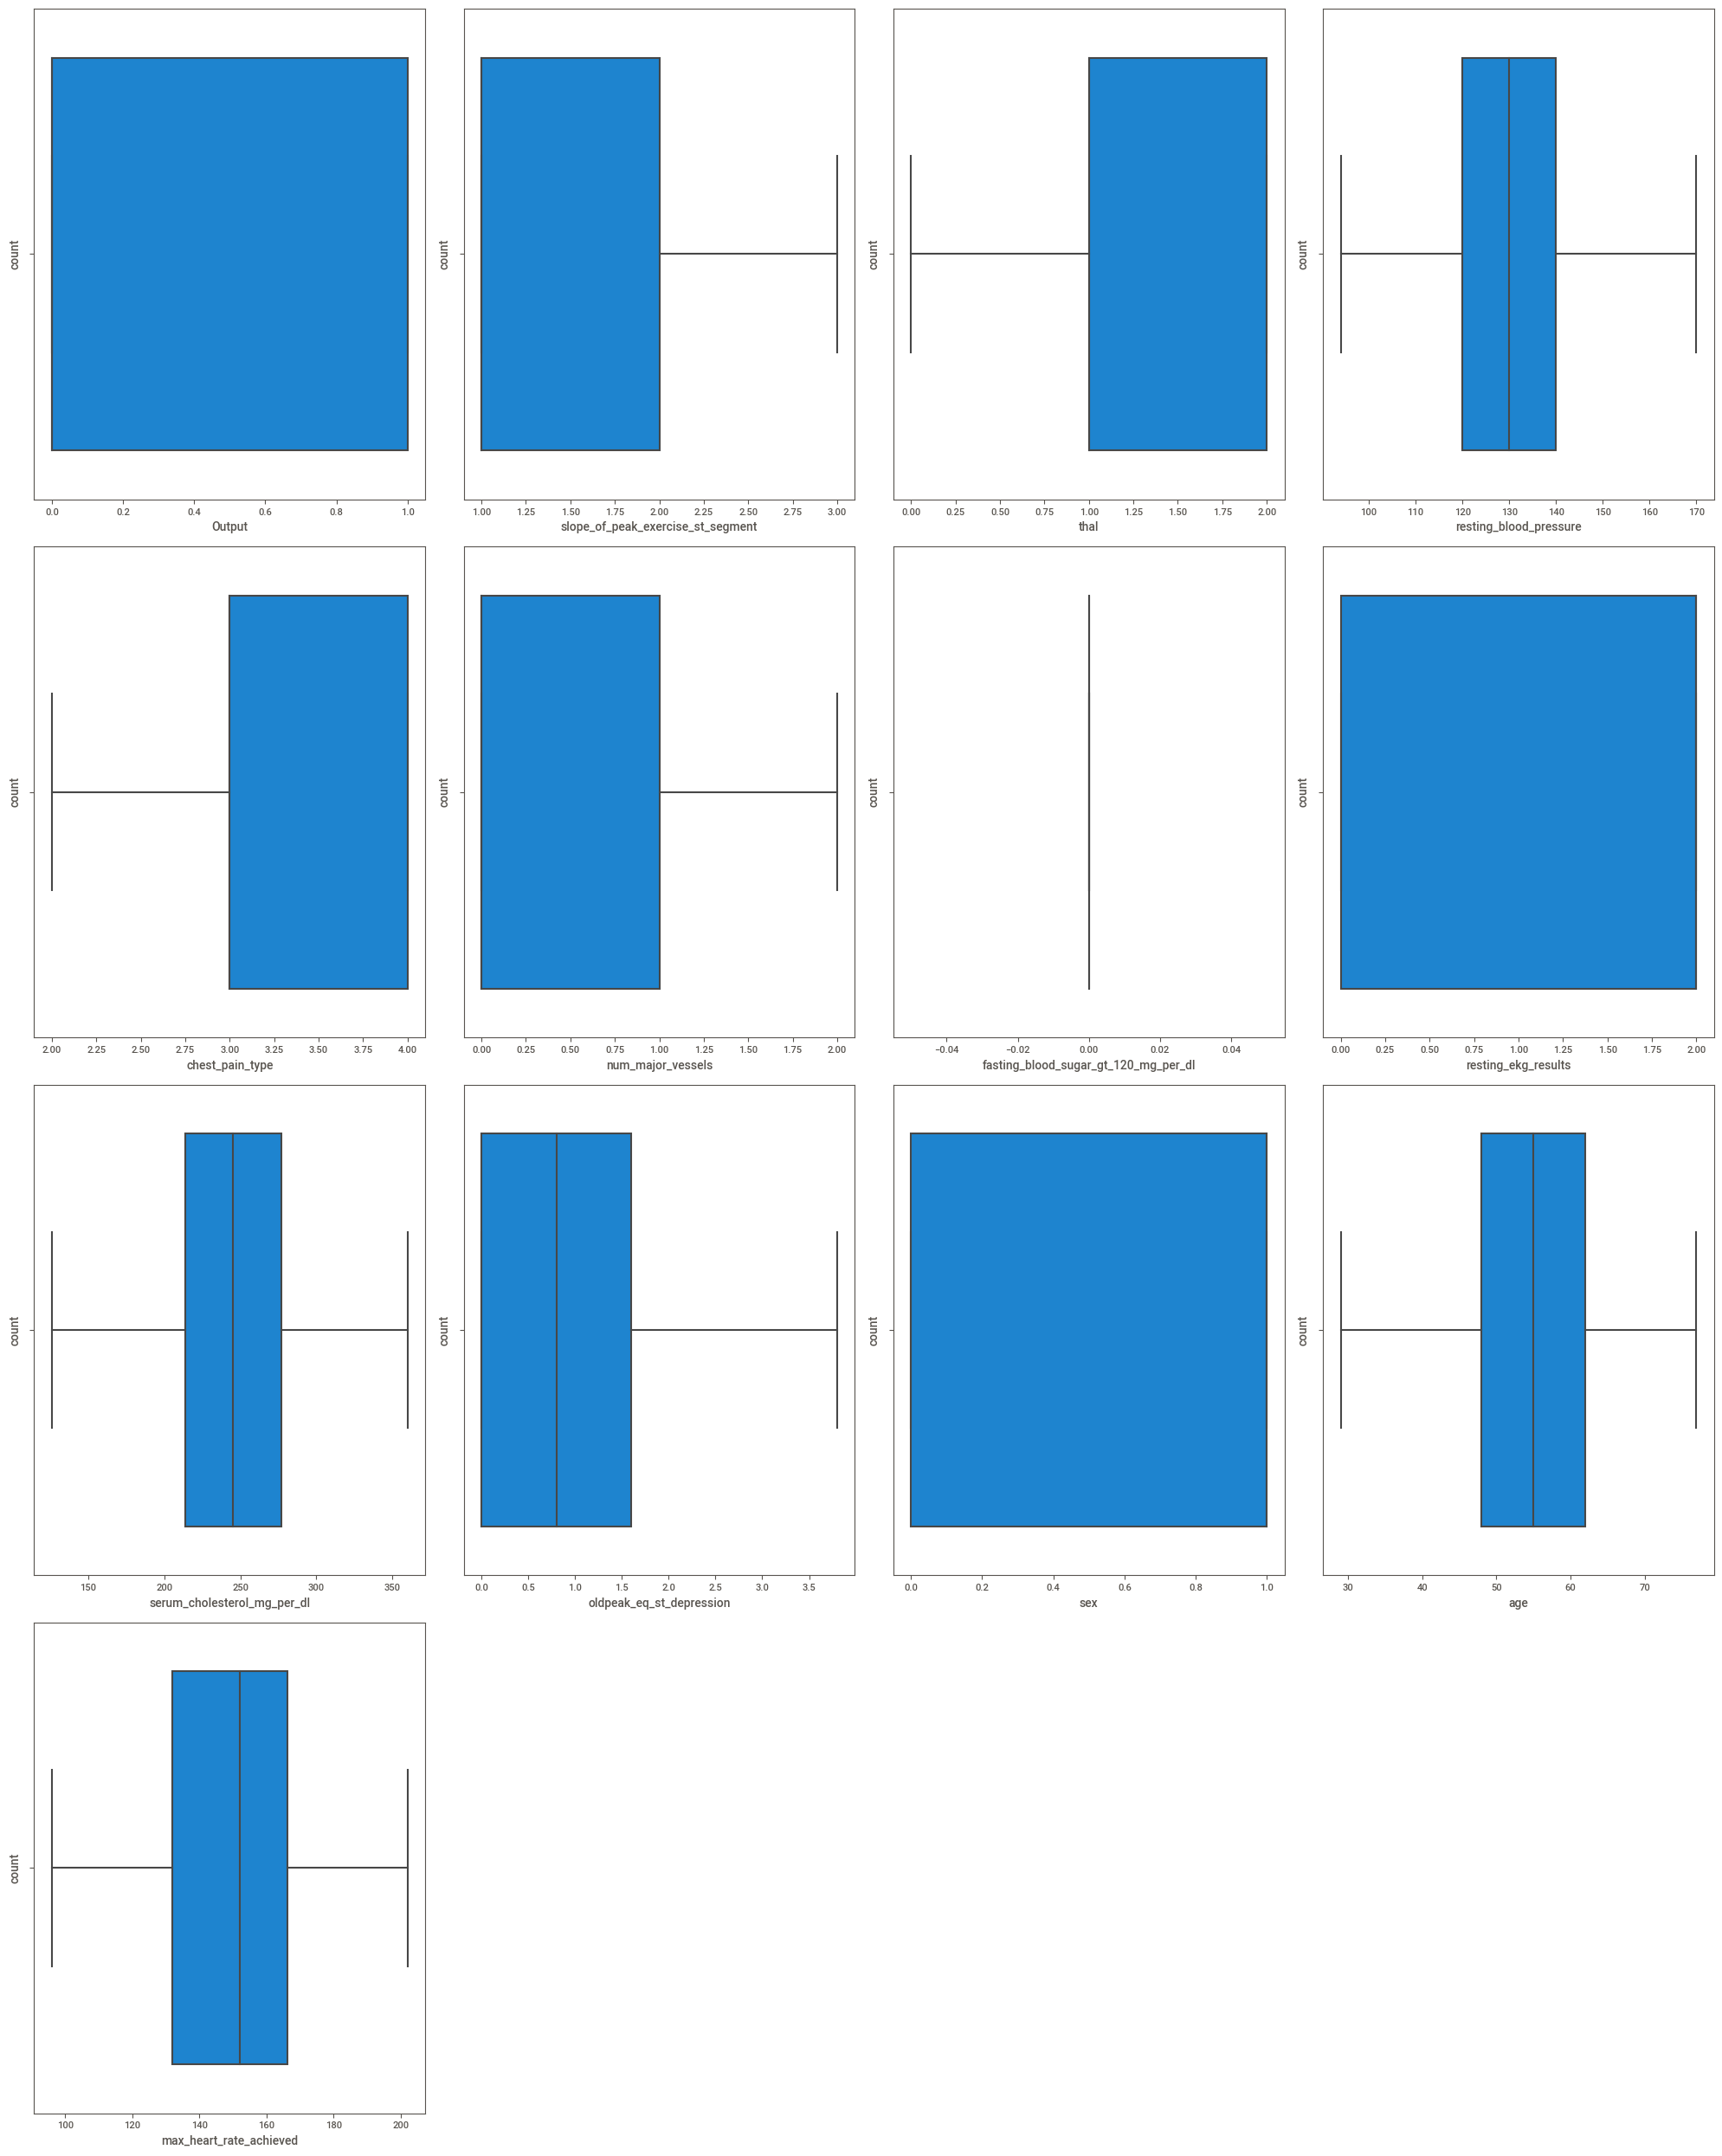

In [37]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:  # Use data.columns to iterate over column names
    if plotnumber <= 13:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=data[column])  # Use x=data[column] to specify the column for boxplot
        plt.xlabel(column)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()
plt.show()

In [38]:
data

,Output,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0
1,0,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0
2,1,1,1,125,4,0,0,2,304.0,0.0,1,77,162,1
3,1,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0
4,0,3,2,130,3,0,0,2,270.0,0.8,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,2,125,4,2,0,0,254.0,0.2,1,67,163,0
176,1,2,1,130,4,0,0,1,327.0,3.4,0,55,117,1
177,1,2,2,125,3,0,0,0,309.0,1.8,1,64,131,1
178,0,1,1,124,3,2,0,0,255.0,0.0,1,48,175,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Output                                180 non-null    int64  
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    int32  
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    float64
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

# Data Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = data.select_dtypes(include=['int', 'float']).columns

scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [41]:
data

,Output,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0.0,0.0,0.5,0.447368,0.0,0.0,0.0,1.0,0.777778,0.000000,1.0,0.333333,0.698113,0.0
1,0.0,0.5,0.5,0.210526,0.5,0.0,0.0,0.0,0.376068,0.421053,0.0,0.520833,0.584906,0.0
2,1.0,0.0,0.5,0.407895,1.0,0.0,0.0,1.0,0.760684,0.000000,1.0,1.000000,0.622642,1.0
3,1.0,0.0,1.0,0.763158,1.0,0.0,0.0,0.0,0.414530,0.000000,1.0,0.229167,0.801887,0.0
4,0.0,1.0,1.0,0.473684,0.5,0.0,0.0,1.0,0.615385,0.210526,1.0,0.625000,0.462264,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.0,0.5,1.0,0.407895,1.0,1.0,0.0,0.0,0.547009,0.052632,1.0,0.791667,0.632075,0.0
176,1.0,0.5,0.5,0.473684,1.0,0.0,0.0,0.5,0.858974,0.894737,0.0,0.541667,0.198113,1.0
177,1.0,0.5,1.0,0.407895,0.5,0.0,0.0,0.0,0.782051,0.473684,1.0,0.729167,0.330189,1.0
178,0.0,0.0,0.5,0.394737,0.5,1.0,0.0,0.0,0.551282,0.000000,1.0,0.395833,0.745283,0.0


# Data Splitting

In [42]:
x=data.iloc[:,1:]
y=data.Output

In [43]:
x

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0.0,0.5,0.447368,0.0,0.0,0.0,1.0,0.777778,0.000000,1.0,0.333333,0.698113,0.0
1,0.5,0.5,0.210526,0.5,0.0,0.0,0.0,0.376068,0.421053,0.0,0.520833,0.584906,0.0
2,0.0,0.5,0.407895,1.0,0.0,0.0,1.0,0.760684,0.000000,1.0,1.000000,0.622642,1.0
3,0.0,1.0,0.763158,1.0,0.0,0.0,0.0,0.414530,0.000000,1.0,0.229167,0.801887,0.0
4,1.0,1.0,0.473684,0.5,0.0,0.0,1.0,0.615385,0.210526,1.0,0.625000,0.462264,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,1.0,0.407895,1.0,1.0,0.0,0.0,0.547009,0.052632,1.0,0.791667,0.632075,0.0
176,0.5,0.5,0.473684,1.0,0.0,0.0,0.5,0.858974,0.894737,0.0,0.541667,0.198113,1.0
177,0.5,1.0,0.407895,0.5,0.0,0.0,0.0,0.782051,0.473684,1.0,0.729167,0.330189,1.0
178,0.0,0.5,0.394737,0.5,1.0,0.0,0.0,0.551282,0.000000,1.0,0.395833,0.745283,0.0


In [44]:
y

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
175    1.0
176    1.0
177    1.0
178    0.0
179    0.0
Name: Output, Length: 180, dtype: float64

# Model Training

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [46]:
x_train

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
168,1.0,0.0,0.671053,0.5,0.0,0.0,1.0,0.457265,0.605263,1.0,0.708333,0.509434,0.0
146,0.0,1.0,0.605263,0.5,0.0,0.0,0.0,0.311966,0.368421,1.0,0.229167,0.773585,1.0
34,0.5,1.0,0.236842,0.5,0.5,0.0,1.0,0.444444,0.657895,1.0,0.604167,0.650943,0.0
66,0.5,0.5,0.473684,1.0,0.0,0.0,1.0,0.837607,0.631579,1.0,0.854167,0.122642,0.0
4,1.0,1.0,0.473684,0.5,0.0,0.0,1.0,0.615385,0.210526,1.0,0.625000,0.462264,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,0.315789,0.5,0.5,0.0,0.0,0.645299,0.263158,1.0,0.812500,0.518868,0.0
32,1.0,1.0,0.605263,1.0,0.0,0.0,1.0,0.329060,0.815789,1.0,0.500000,0.556604,1.0
124,0.5,0.5,0.868421,1.0,0.0,0.0,1.0,0.683761,0.394737,1.0,0.791667,0.113208,1.0
131,0.5,0.5,0.078947,1.0,0.0,0.0,1.0,0.521368,0.263158,0.0,0.604167,0.245283,0.0


In [47]:
y_train

168    0.0
146    0.0
34     1.0
66     1.0
4      0.0
      ... 
95     0.0
32     1.0
124    1.0
131    0.0
158    0.0
Name: Output, Length: 144, dtype: float64

In [48]:
x_test

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
174,0.0,0.5,0.605263,1.0,0.0,0.0,0.0,0.482906,0.315789,1.0,0.520833,0.603774,0.0
101,0.5,0.5,0.605263,0.0,0.0,0.0,1.0,0.717949,0.342105,0.0,0.562500,0.537736,0.0
45,0.0,1.0,0.394737,0.0,0.0,0.0,0.0,0.576923,0.078947,1.0,0.583333,0.424528,0.0
28,0.5,0.5,0.605263,0.5,0.0,0.0,1.0,0.252137,0.789474,1.0,0.645833,0.556604,0.0
150,0.0,1.0,0.184211,0.0,0.0,0.0,0.0,0.782051,0.000000,1.0,0.520833,0.566038,0.0
10,0.5,0.5,0.342105,1.0,0.0,0.0,1.0,0.752137,0.105263,1.0,0.770833,0.518868,0.0
0,0.0,0.5,0.447368,0.0,0.0,0.0,1.0,0.777778,0.000000,1.0,0.333333,0.698113,0.0
3,0.0,1.0,0.763158,1.0,0.0,0.0,0.0,0.414530,0.000000,1.0,0.229167,0.801887,0.0
64,0.0,0.5,0.210526,1.0,0.0,0.0,1.0,0.547009,0.000000,0.0,0.437500,0.594340,0.0
135,0.0,1.0,0.342105,1.0,0.0,0.0,0.0,0.217949,0.105263,1.0,0.750000,0.415094,0.0


In [49]:
y_test

174    0.0
101    0.0
45     1.0
28     1.0
150    0.0
10     0.0
0      0.0
3      1.0
64     0.0
135    0.0
161    1.0
160    0.0
115    0.0
84     0.0
40     0.0
122    0.0
29     0.0
155    1.0
144    1.0
35     0.0
113    1.0
116    0.0
69     1.0
170    1.0
80     0.0
169    0.0
153    1.0
159    1.0
58     0.0
165    0.0
138    0.0
90     0.0
152    1.0
72     0.0
38     0.0
89     0.0
Name: Output, dtype: float64

# Importing Model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes impo1rt GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report,f1_score

# Model Evaluation

In [51]:
def evaluate_model(true, predicted):
    # Compute evaluation metrics
    confusion_mat = confusion_matrix(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    class_report = classification_report(true, predicted)
    f1 = f1_score(true, predicted)

    return confusion_mat, accuracy, precision, class_report, f1

In [52]:
models ={
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'XGBClassifier': XGBClassifier()
}

model_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset   confusion_mat, accuracy, precision, class_report, f1
    model_train_confusion_mat, model_train_accuracy, model_train_precision, model_train_class_report, model_train_f1 = evaluate_model(y_train, y_train_pred)

    model_test_confusion_mat, model_test_accuracy, model_test_precision, model_test_class_report, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- confusion_matrix:\n", model_train_confusion_mat)
    print("- accuracy_score: {:.4f}".format(model_train_accuracy))
    print("- precision_score: {:.4f}".format(model_train_precision))
    print("- classification_report:\n", model_train_class_report)
    print("- f1_score: {:.4f}".format(model_train_f1))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- confusion_matrix:\n", model_test_confusion_mat)
    print("- accuracy_score: {:.4f}".format(model_test_accuracy))
    print("- precision_score: {:.4f}".format(model_test_precision))
    print("- classification_report:\n", model_test_class_report)
    print("- f1_score: {:.4f}".format(model_test_f1))

    f1_list.append(model_test_f1)

    print('='*35)
    print('\n')


LogisticRegression
Model performance for Training set
- confusion_matrix:
 [[65 11]
 [12 56]]
- accuracy_score: 0.8403
- precision_score: 0.8358
- classification_report:
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        76
         1.0       0.84      0.82      0.83        68

    accuracy                           0.84       144
   macro avg       0.84      0.84      0.84       144
weighted avg       0.84      0.84      0.84       144

- f1_score: 0.8296
----------------------------------
Model performance for Test set
- confusion_matrix:
 [[21  3]
 [ 5  7]]
- accuracy_score: 0.7778
- precision_score: 0.7000
- classification_report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        24
         1.0       0.70      0.58      0.64        12

    accuracy                           0.78        36
   macro avg       0.75      0.73      0.74        36
weighted avg       0.77     

XGBClassifier
Model performance for Training set
- confusion_matrix:
 [[76  0]
 [ 0 68]]
- accuracy_score: 1.0000
- precision_score: 1.0000
- classification_report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

- f1_score: 1.0000
----------------------------------
Model performance for Test set
- confusion_matrix:
 [[21  3]
 [ 4  8]]
- accuracy_score: 0.8056
- precision_score: 0.7273
- classification_report:
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        24
         1.0       0.73      0.67      0.70        12

    accuracy                           0.81        36
   macro avg       0.78      0.77      0.78        36
weighted avg       0.80      0.81

# Data Balancing

In [53]:
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print(Counter(y_sm))

Counter({0.0: 100, 1.0: 80})
Counter({0.0: 100, 1.0: 100})


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=42)

In [55]:
models ={
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'XGBClassifier': XGBClassifier()
}

model_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset   confusion_mat, accuracy, precision, class_report, f1
    model_train_confusion_mat, model_train_accuracy, model_train_precision, model_train_class_report, model_train_f1 = evaluate_model(y_train, y_train_pred)

    model_test_confusion_mat, model_test_accuracy, model_test_precision, model_test_class_report, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- confusion_matrix:\n", model_train_confusion_mat)
    print("- accuracy_score: {:.4f}".format(model_train_accuracy))
    print("- precision_score: {:.4f}".format(model_train_precision))
    print("- classification_report:\n", model_train_class_report)
    print("- f1_score: {:.4f}".format(model_train_f1))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- confusion_matrix:\n", model_test_confusion_mat)
    print("- accuracy_score: {:.4f}".format(model_test_accuracy))
    print("- precision_score: {:.4f}".format(model_test_precision))
    print("- classification_report:\n", model_test_class_report)
    print("- f1_score: {:.4f}".format(model_test_f1))

    f1_list.append(model_test_f1)

    print('='*35)
    print('\n')


LogisticRegression
Model performance for Training set
- confusion_matrix:
 [[59 15]
 [14 62]]
- accuracy_score: 0.8067
- precision_score: 0.8052
- classification_report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80        74
         1.0       0.81      0.82      0.81        76

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150

- f1_score: 0.8105
----------------------------------
Model performance for Test set
- confusion_matrix:
 [[23  3]
 [ 7 17]]
- accuracy_score: 0.8000
- precision_score: 0.8500
- classification_report:
               precision    recall  f1-score   support

         0.0       0.77      0.88      0.82        26
         1.0       0.85      0.71      0.77        24

    accuracy                           0.80        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.81     

XGBClassifier
Model performance for Training set
- confusion_matrix:
 [[74  0]
 [ 0 76]]
- accuracy_score: 1.0000
- precision_score: 1.0000
- classification_report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        74
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

- f1_score: 1.0000
----------------------------------
Model performance for Test set
- confusion_matrix:
 [[22  4]
 [ 4 20]]
- accuracy_score: 0.8400
- precision_score: 0.8333
- classification_report:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        26
         1.0       0.83      0.83      0.83        24

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84

# Conclusion



## The models with the best performance for Heart Disease Prediction campaign are:

**1.SVC:**

    - Offers consistently high accuracy with accuracy_score: 0.8800
    - precision_score: 0.9500
    
    - Maintains a decent balance between precision and recall.
    
    
**2. GaussianNB:**

    - Achieves similar accuracy to SVC with accuracy_score: 0.8600
    
    - Offers higher precision of recision_score: 0.9048 
   
